### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск

In [12]:
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [37]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

### Практическое задание

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [18]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]]).T
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

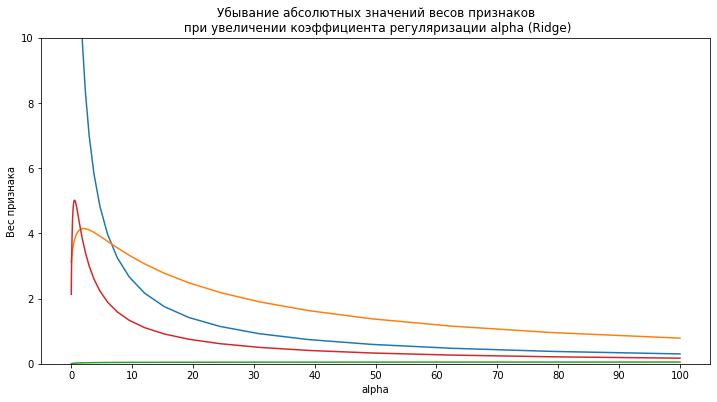

In [23]:
n = 50

train_amount = 6
train_X = X[:train_amount]
train_y = y[:train_amount]
test_X = X[train_amount:]
test_y = y[train_amount:]


coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim(0, 10)
for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])
    

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно, получится что-то типа стандартизации, но больше вычислений. Практического смысла в этом я не увидел.

In [25]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [26]:
X_norm = X.copy().astype('float64')
X_norm = min_max_scale(X_norm[:, 1:])
X_norm.min(axis=0), X_norm.max(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [27]:
X_norm.mean(axis=0), X_norm.std(axis=0)

(array([0.3       , 0.33870968, 0.35      ]),
 array([0.28284271, 0.31283671, 0.39051248]))

In [28]:
X_norm_st = standard_scale(X_norm)
X_norm_st.min(axis=0), X_norm_st.max(axis=0)

(array([-1.06066017, -1.08270439, -0.89625816]),
 array([2.47487373, 2.11385144, 1.66447944]))

In [30]:
X_norm_st.mean(axis=0), X_norm_st.std(axis=0)

(array([-1.49880108e-16, -6.86950496e-17,  8.32667268e-17]),
 array([1., 1., 1.]))

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

Отвечая на несформулированные в задании вопросы, за которые наверняка можно снять балл-другой,
оставлю некоторые очевидные примечания:
1. Отличие от l2 - в производной модуля. Это знак выражения под модулем (-1 для отрицательных, 0 для 0, +1 для положительных). Модуль - это такая штука, которая возвращает абсолютное значение аргумента.
2. Подбор параметров функции не входит в периметр задания и остается за кадром
3. В первой задаче использована библиотечная реализация l2, поскольку суть задании - в наблюдении за динамикой весов в зависимости от alpha (посмотреть, как плавно изменяются веса в отличие от l1; посмотреть, что веса не зануляются)

In [53]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(69)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        if i % 100 == 0:
            print(i, W, err)
    return W

In [58]:
eval_model_reg2(X, y, 5500, lambda_=0.2)

100 [ 0.30834584 -1.20196625  2.96953707 -1.2030565 ] 2679.210684950704
200 [-0.25055045 -1.75422844  4.63778639 -1.75834734] 2307.1419130901204
300 [-0.76437481 -2.26389815  6.17779115 -2.27085804] 1990.1720615999031
400 [-1.23862852 -2.73425515  7.5994266  -2.74388277] 1720.0415208871261
500 [-1.67635506 -3.16832308  8.91179684 -3.18045854] 1489.825645923506
600 [-2.08036385 -3.56889305 10.12330578 -3.58338873] 1293.6237581813048
700 [-2.45324821 -3.93854147 11.24171096 -3.95526112] 1126.4077105006102
800 [-2.79740202 -4.27964662 12.27417324 -4.29846445] 983.8928492184805
900 [-3.11503502 -4.59440383 13.22730276 -4.61520375] 862.4280608953992
1000 [-3.40818701 -4.88483961 14.1072012  -4.90751443] 758.9020809421603
1100 [-3.67874089 -5.15282458 14.919501   -5.17727538] 670.6636589474344
1200 [-3.92843474 -5.4000855  15.66940135 -5.42622096] 595.4535312519934
1300 [-4.15887297 -5.62821631 16.36170157 -5.65595213] 531.3464544435121
1400 [-4.37153659 -5.83868837 17.00083186 -5.86794674] 

array([-6.80844339, -8.22669225, 24.41266766, -8.29087186])